## Imports & dataset loading

In [76]:
import pandas as pd

In [77]:
import numpy as np


In [78]:
import seaborn as sns

In [79]:
import matplotlib
import matplotlib.pyplot as plt


In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [83]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [84]:
import joblib

Load Dataset

In [85]:
dataset = pd.read_csv('listings.csv')

In [86]:
dataset.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [88]:
print(dataset['price'].dtype)

object


In [89]:
dataset['price']=dataset['price'].apply(lambda x: x[1:])
dataset['price']=dataset['price'].str.replace(',','')
dataset['price'] = dataset['price'].astype(float)

/home/utilisateur/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

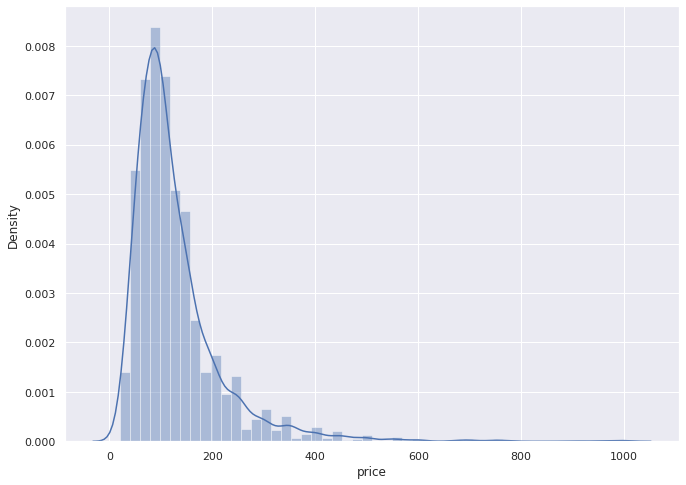

In [91]:
sns.distplot(dataset['price'])

In [92]:
dataset = dataset[dataset['price']<400]

<AxesSubplot:xlabel='room_type', ylabel='price'>

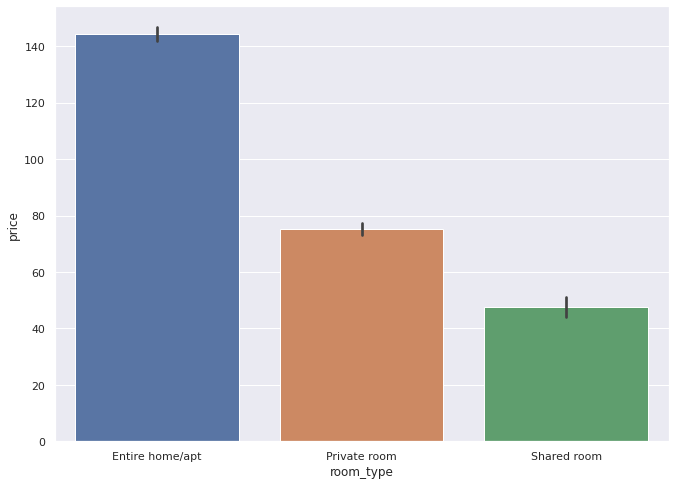

In [93]:
sns.barplot(y=dataset['price'], x=dataset['room_type'])

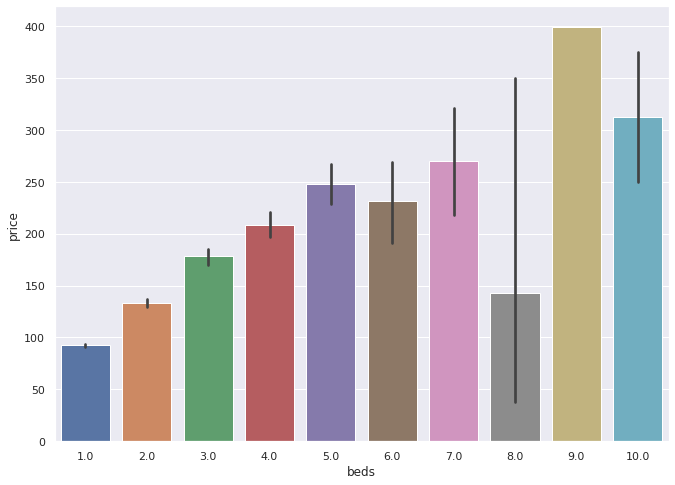

In [94]:
ax = sns.barplot(y=dataset['price'], x=dataset['beds'])

[Text(0, 0, 'Apartment'),
 Text(1, 0, 'House'),
 Text(2, 0, 'Cabin'),
 Text(3, 0, 'Condominium'),
 Text(4, 0, 'Camper/RV'),
 Text(5, 0, 'Bungalow'),
 Text(6, 0, 'Townhouse'),
 Text(7, 0, 'Loft'),
 Text(8, 0, 'Boat'),
 Text(9, 0, 'Bed & Breakfast'),
 Text(10, 0, 'Other'),
 Text(11, 0, 'Dorm'),
 Text(12, 0, 'Treehouse'),
 Text(13, 0, 'Yurt'),
 Text(14, 0, 'Chalet'),
 Text(15, 0, 'Tent')]

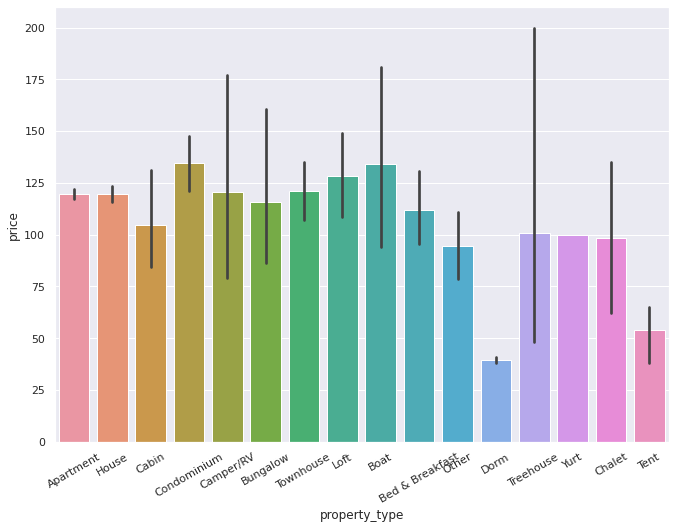

In [95]:
sns.set(rc={'figure.figsize':(11,8)})
ax = sns.barplot(y=dataset['price'], x=dataset['property_type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

In [96]:
# Separate target variable y from features X
target_variable = "price"
X = dataset.loc[:,[c for c in dataset.columns if c!= target_variable]] # All columns are kept, except the target 
y = dataset.loc[:,target_variable] 

In [97]:
X = dataset[['experiences_offered', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'requires_license', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count',
       'reviews_per_month']]

In [98]:
print("Percentage of missing values: ")
print(100*X.isnull().sum().sort_values(ascending=False)/X.shape[0]) 

Percentage of missing values: 
security_deposit                    51.617215
cleaning_fee                        27.265437
host_acceptance_rate                19.887731
review_scores_accuracy              17.107725
review_scores_checkin               17.107725
review_scores_value                 17.054264
review_scores_location              17.027533
review_scores_cleanliness           16.974071
review_scores_communication         16.920609
review_scores_rating                16.813686
reviews_per_month                   16.305801
host_response_rate                  13.552526
host_response_time                  13.552526
bathrooms                            0.427693
bedrooms                             0.160385
host_has_profile_pic                 0.053462
host_is_superhost                    0.053462
host_listings_count                  0.053462
host_total_listings_count            0.053462
host_identity_verified               0.053462
beds                                 0.026731
pro

In [99]:
# Step 1 : Suppression des colonnes avec trop de NA (usuellement 50%)
limitPer = len(dataset) * .50
X = X.dropna(thresh=limitPer, axis=1)


In [103]:
X.shape[0]

3741

In [106]:
X['cleaning_fee']

0           NaN
1        $40.00
3           NaN
5        $40.00
6           NaN
         ...   
3813    $230.00
3814     $50.00
3815     $35.00
3816     $45.00
3817        NaN
Name: cleaning_fee, Length: 3741, dtype: object

In [102]:
print("Percentage of missing values: ")
print(X.isnull().sum().sort_values(ascending=False)) 

Percentage of missing values: 
cleaning_fee                        1020
host_acceptance_rate                 744
review_scores_accuracy               640
review_scores_checkin                640
review_scores_value                  638
review_scores_location               637
review_scores_cleanliness            635
review_scores_communication          633
review_scores_rating                 629
reviews_per_month                    610
host_response_time                   507
host_response_rate                   507
bathrooms                             16
bedrooms                               6
host_is_superhost                      2
host_listings_count                    2
host_total_listings_count              2
host_identity_verified                 2
host_has_profile_pic                   2
property_type                          1
beds                                   1
require_guest_phone_verification       0
calculated_host_listings_count         0
require_guest_profile_pict

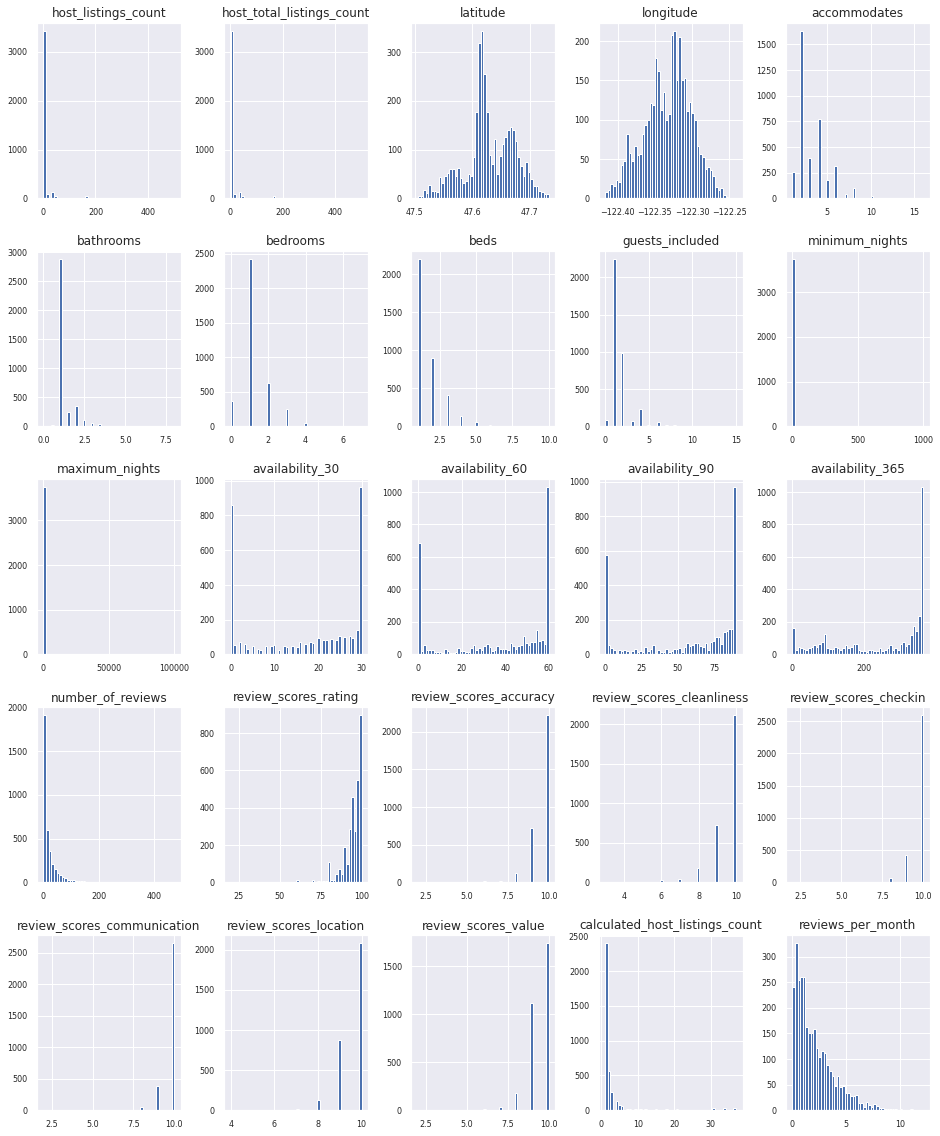

In [75]:
# listing dataframes types
list(set(X.dtypes.tolist()))
# include only float and integer
df_num = X.select_dtypes(include = ['float64', 'int64', 'UInt32'])
# display what has been selected
df_num.head()
# plot
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [109]:
X_clean = X

In [110]:
X_clean.cleaning_fee = X_clean.cleaning_fee.apply(lambda x: float(x[1:])/100 if type(x) == str else x) 

In [111]:
X_clean.extra_people = X_clean.extra_people.apply(lambda x: float(x[1:])/100 if type(x) == str else x) 

In [116]:
X_clean['host_response_rate']=X_clean['host_response_rate'].str.replace('%','')
X_clean['host_response_rate'].astype(float)


In [120]:
X_clean.host_has_profile_pic = X_clean.host_has_profile_pic.fillna("f")
X_clean.host_identity_verified = X_clean.host_identity_verified.fillna("f")
X_clean.host_response_time = X_clean.host_response_time.fillna("Unknown")
X_clean.host_is_superhost = X_clean.host_is_superhost.fillna("Unknown")
X_clean.property_type = X_clean.property_type.fillna("unknown")

In [121]:
X_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3741 entries, 0 to 3817
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   experiences_offered               3741 non-null   object 
 1   host_response_time                3741 non-null   object 
 2   host_response_rate                3234 non-null   object 
 3   host_acceptance_rate              2997 non-null   object 
 4   host_is_superhost                 3741 non-null   object 
 5   host_listings_count               3739 non-null   float64
 6   host_total_listings_count         3739 non-null   float64
 7   host_has_profile_pic              3741 non-null   object 
 8   host_identity_verified            3741 non-null   object 
 9   neighbourhood_group_cleansed      3741 non-null   object 
 10  latitude                          3741 non-null   float64
 11  longitude                         3741 non-null   float64
 12  proper

In [123]:
X.dtypes.tolist()

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64')]

In [139]:
# Automatically detect positions of numeric/categorical features
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X_clean.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month']  at positions  [5, 6, 10, 11, 14, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 42, 43]
Found categorical features  ['experiences_offered', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'bed_type', 'has_availability', 'requires_license'

In [141]:
num_col = X_clean.select_dtypes([np.number]).columns
cat_col = X_clean.select_dtypes("object").columns

X_num = X_clean[num_col]
X_cat =  pd.get_dummies(X_clean[cat_col],drop_first=True)

In [146]:
from sklearn.model_selection import train_test_split



X_train_num, X_test_num, X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_num, X_cat, y, test_size =0.2)

In [143]:
# Define preprocessing for numeric columns (normalize them so they're on the same scale)
from sklearn.impute import SimpleImputer
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features
categorical_features = []
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [144]:
preprocessor.fit_transform(X_train)

array([[-0.21632671, -0.21632671, -0.20244352, ...,  0.6387129 ,
        -0.33191648, -0.54118523],
       [-0.21632671, -0.21632671, -0.24771953, ...,  0.6387129 ,
        -0.33191648, -0.61096371],
       [-0.21632671, -0.21632671,  0.24201919, ...,  0.6387129 ,
        -0.33191648, -0.25625644],
       ...,
       [-0.21632671, -0.21632671, -0.66313068, ..., -0.75707206,
        -0.33191648,  0.68575302],
       [-0.07558533, -0.07558533, -0.14308766, ...,  0.6387129 ,
        -0.33191648, -0.25625644],
       [ 1.05034574,  1.05034574, -0.04684616, ...,  0.6387129 ,
         5.75061591, -1.11104281]])

In [145]:
from sklearn.ensemble import AdaBoostRegressor
AdaReg = AdaBoostRegressor()
model = AdaReg.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
AdaReg.

# FIN